In [41]:
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
from numpy import linalg as LA
#
%matplotlib inline
plt.style.use('seaborn-white')
import warnings
warnings.filterwarnings("ignore")

# Data Smoothing
* [Savitzky-Golay Filter](#Savitzky-Golay-Filter)

Data Smoothing is a tool that eliminates noise from a dataset. To exlain this, consider $f(x)=\sin(x)\cos(x)$ with $0\leq x \leq 4\pi$. We can discretize $[0,4\pi]$ using 100 points. We have

In [42]:
## Data
x = np.linspace(0, 4*np.pi, 100)
y = np.sin(x)*np.cos(x)

Adding noise to the data using [*numpy.random.normal*](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html).

In [43]:
## Noisy Data
mu, sigma = 0, 0.1 # mean and standard deviation
noise = np.random.normal(mu, sigma, len(x))
y_noise = y + noise

## Savitzky-Golay Filter

Without getting into the details, we only apply Savitzky–Golay filter here and interested readers can see [this link](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter#Treatment_of_first_and_last_points) for more details. We use **scipy.signal.savgol_filter** from **scipy** package. The details on the usage of this package can be found [here](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.savgol_filter.html).

In [44]:
## Filtering noisy data
y_filtered=signal.savgol_filter(y_noise,23,4)

Let's plot the data.

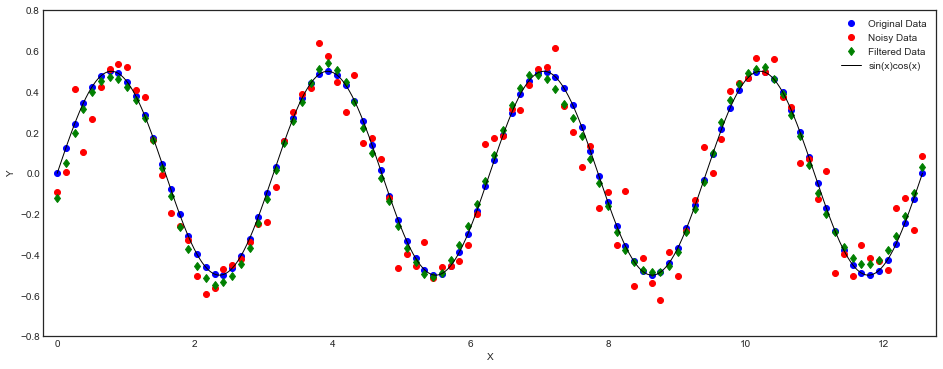

In [45]:
plt.figure(figsize=(16, 6))
plt.plot(x, y, 'bo',label='Original Data', linewidth=1)
plt.plot(x, y_noise, 'ro',label='Noisy Data', linewidth=1)
plt.plot(x, y_filtered, 'gd',label='Filtered Data', linewidth=1)
t=np.linspace(0, 4*np.pi, 1e4);
plt.plot(t, np.sin(t)*np.cos(t), 'k',label='sin(x)cos(x)', linewidth=1)
del t
plt.ylabel('Y')
plt.xlabel('X')
plt.xlim(x[0]-0.2,x[-1]+0.2)
plt.ylim(-0.8,0.8)
plt.legend()

As can be seen, the filtered data are much closer to the original data. In other words,

In [46]:
LA.norm(np.abs(y-y_noise), np.inf)

0.2715364401732215

In [14]:
LA.norm(np.abs(y-y_filtered), np.inf)

0.08098177285176482

* * *